In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read the data.json file into a pandas dataframe
data = pd.read_json("data.json")

# Get information about the dataframe
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mile       13 non-null     int64  
 1   Pace       13 non-null     float64
 2   HR         13 non-null     int64  
 3   Elevation  13 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 520.0 bytes
None


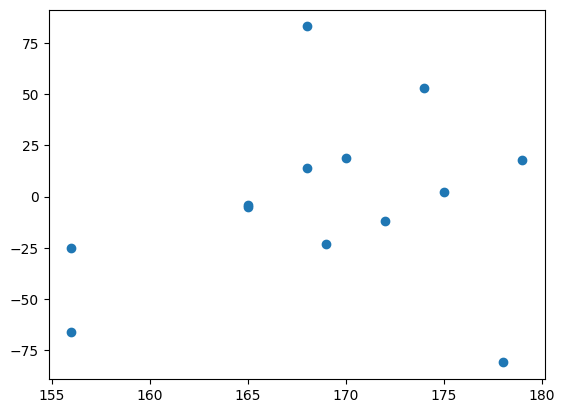

In [2]:
# get x coordinates from the HR column
x = data["HR"]

# get y coordinates from the Elevation column
y = data["Elevation"]

# scatter plot the x and y coordinates
plt.scatter(x, y)
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


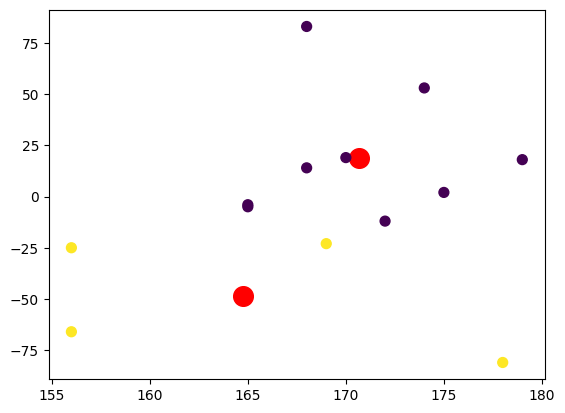

In [7]:
# implement kmeans clustering using scikit

# turn the dataset into a set of coordinates using zip
coordinates = list(zip(x, y))

# create a kmeans object with k=2
kmeans = KMeans(n_clusters=2)

# fit the kmeans object to the coordinates
kmeans.fit(coordinates)

# get the cluster labels
labels = kmeans.labels_

# get the cluster centers
centers = kmeans.cluster_centers_

# plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200)

# plot the x and y coordinates with labels
plt.scatter(x, y, c=labels, s=50, cmap="viridis")
plt.show()

In [9]:
# write the centroid coordinates to a csv file
pd.DataFrame(centers).to_csv("centroids.csv")

# Upload centroids.csv file to s3 bucket using boto3
import boto3

def upload_file(file_name, bucket, object_name=None):
    s3_client = boto3.client('s3')
    s3_bucket = boto3.resource('s3').Bucket(bucket)
    s3_client.upload_file(file_name, bucket, object_name)


#upload_file("centroids.csv", "kmeans-bucket")
